In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen #url의 html 을 가져 오기 위한 패키지
from bs4 import BeautifulSoup  #크롤링 필수 패키지 설치하려면 cmd창에서 pip install bs4
import os
import re
from selenium import webdriver
from bs4 import BeautifulSoup #크롤링 도구
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import os
import re
import time
import json
import datetime
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import sklearn as skl
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from ckonlpy.tag import Twitter
import string
import glob
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import warnings
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import font_manager, rc
from ckonlpy.tag import Postprocessor
#글씨체
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/H2HDRM.TTF').get_name()
rc('font', family=font_name)

In [2]:
data50 = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/data0928.xlsx', index_col=0)
data50['words'] = [i.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').split(',') for i in
          list(data50['words'])]  # words가 텍스트 형식으로 되어 있을 경우

In [3]:
embedding_model = KeyedVectors.load_word2vec_format('C:/Users/USER/Desktop/1~8newsurl/w2v') # 모델 로드

In [4]:
def scoring(word):
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(word))):
        for k in word[i]:
            try:
                 # 비교하여 similarity 구하기
                dist_dist.append(embedding_model.similarity('고용', k))
            except:
                dist_dist.append(0)
            dist.append(np.array(dist_dist))
            dist_dist = []
        avg_dist.append(np.mean(dist))
        dist = []
    return avg_dist
a = scoring(data50['words'])
data50['score'] = a
data50_sorted = data50.sort_values(by="score", ascending=False)

100%|██████████████████████████████████████████████████████████████████████████| 56709/56709 [00:31<00:00, 1772.44it/s]


In [11]:
data50 = data50.sort_values(by='score', ascending=False)
data1000 = data50[:1000]
data1000

,date,title,text,category,url,words,length_word,score
9696,2020-03-25,"[코로나19 함께 넘자]고용유지기업지원금 90%로 상향, 예산도 5000억으로 확대",정부가 코로나19로 피해를 입은 기업이 적극적으로 고용을 유지하도록 한시적으로 고용...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"[코로나19, 고용, 지하도, 고용, 고용노동부, 고용, 고용, 고용보험, 고용, ...",178,0.612862
2882,2020-03-09,피해 큰 여행·관광업 '특별고용지원 업종' 지정,코로나19의 직격탄을 맞은 여행업과 공연업 등이 특별고용지원 업종으로 지정돼 정부 ...,사회,https://news.naver.com/main/read.nhn?mode=LSD&...,"[코로나19, 직격탄, 고용, 고용노동부, 고용, 심의회, 숙박업, 운송업, 고용,...",73,0.575943
47208,2020-07-15,홍남기 “고용 회복 조짐이지만 제조업 악화·청년층 더딘 회복은 걱정”,홍남기 경제부총리가 6월 고용 동향과 관련해 고용 회복 조짐을 보이고 있다면서도 ...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"[경제부총리, 고용, 고용, 제조업, 고용, 부총리, 페이스북, 취업자, 일자리, ...",114,0.530437
3016,2020-03-09,"고용부, 여행·관광숙박·공연업 등 특별고용지원 업종 지정",[아시아경제 김보경 기자] 신종 코로나바이러스감염증(코로나19) 확산의 직격탄을 맞...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"[아시아, 김보경, 코로나바이러스, 감염증, 코로나19, 직격탄, 숙박업, 고용, ...",112,0.518092
50778,2020-07-29,"한은, 신생기업 감소…“고용없는 경기회복 우려”",신생기업의 비중이 계속 감소하면서 노동생산성과 고용창출률에도 부정적인 영향을 미치...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"[고용, 더라도, 일자리, 고용, 한국은행, 우리나라, 고용, 이상인, 고용, 고령...",150,0.517135
...,...,...,...,...,...,...,...,...
40467,2020-06-24,쓸 곳은 넘치는데 稅수입은 위축…중기 재정계획 전면 수정 불가피,각 부처 요구액 6% 증가 전망올 경기악화로 내년 세수 타격재정악화 내년에도 지속 ...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"[GDP, 코로나19, 재정상, 코로나19, 가운데, 일자리, 고용, 한국판, 국가...",180,0.259350
20593,2020-04-22,"한경연 ""코로나19 경제위기에 적극적 경기부양책 필요""","""독립 재정관리기구를 신설해서 재정건전성 유지해야""(서울=연합뉴스) 최윤정 기자 =...",경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"[건전성, 최윤정, 코로나바이러스, 감염증, 코로나19, 경제위기, 부양책, 체질개...",281,0.259204
39869,2020-06-23,"박원순 ""전 국민 고용보험 자영업자 부담 크지 않을 것""","자영업자 단체 대표 ""서울시가 보험료 일부 지원해주면 적극 지지""자영업자 사회안전망...",사회,https://news.naver.com/main/read.nhn?mode=LSD&...,"[자영업자, 서울시, 보험료, 자영업자, 박원순, 서울시장, 자영업자, 김지헌, 박...",188,0.259199
35188,2020-06-03,35.3兆 사상최대 추경… 기업투자 활성화는 430억뿐,홍남기(왼쪽 두 번째) 부총리 겸 기획재정부 장관이 지난달 29일 세종시 정부세종청...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"[부총리, 기획재정부, 세종시, 추가경정예산, 브리핑, 추경안, 국무회의, GDP,...",194,0.259074


In [12]:
news = data1000['words']
id2word = corpora.Dictionary(news)
corpus = [id2word.doc2bow(text) for text in news]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:46<00:00, 11.88s/it]


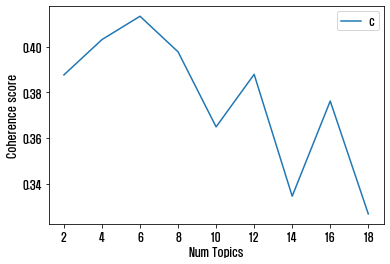

In [13]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=news, start=2,
                                                        limit=20, step=2)
# Show graph
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3877
Num Topics = 4  has Coherence Value of 0.4031
Num Topics = 6  has Coherence Value of 0.4133
Num Topics = 8  has Coherence Value of 0.3978
Num Topics = 10  has Coherence Value of 0.3649
Num Topics = 12  has Coherence Value of 0.3879
Num Topics = 14  has Coherence Value of 0.3345
Num Topics = 16  has Coherence Value of 0.3762
Num Topics = 18  has Coherence Value of 0.3267


In [15]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))


[(0,
  '0.145*"고용보험" + 0.039*"특수고용직" + 0.033*"법인세" + 0.029*"예술인" + 0.027*"정수지" + '
  '0.024*"개정안" + 0.019*"정규직" + 0.018*"민주당" + 0.017*"기자회견" + 0.017*"대타협" + '
  '0.014*"김명환" + 0.012*"노동자" + 0.012*"대표자" + 0.012*"기본소득" + 0.012*"시간제"'),
 (1,
  '0.129*"제조업" + 0.072*"실업급여" + 0.067*"고용보험" + 0.044*"구직" + 0.044*"가입자" + '
  '0.033*"연구원" + 0.031*"노동시장" + 0.026*"지난해" + 0.026*"자동차" + 0.019*"코로나19" + '
  '0.019*"유니콘" + 0.018*"고용" + 0.014*"상반기" + 0.013*"아시아나" + 0.013*"국민연금"'),
 (2,
  '0.095*"고용" + 0.063*"코로나19" + 0.047*"취업자" + 0.034*"포인트" + 0.031*"일자리" + '
  '0.030*"서비스업" + 0.026*"실업" + 0.023*"구직" + 0.022*"실업자" + 0.022*"코로나" + '
  '0.020*"제조업" + 0.019*"실업률" + 0.017*"취업" + 0.017*"지난해" + 0.017*"경제활동"'),
 (3,
  '0.056*"고용" + 0.053*"코로나19" + 0.032*"부총리" + 0.029*"기획재정부" + 0.024*"일자리" + '
  '0.022*"유동성" + 0.020*"기간산업" + 0.019*"대통령" + 0.017*"GDP" + 0.017*"국가채무" + '
  '0.015*"한국판" + 0.015*"코로나" + 0.012*"글로벌" + 0.012*"긴급재난지원금" + 0.012*"하반기"'),
 (4,
  '0.209*"최저임금" + 0.161*"일자리" + 0.065*"청년" + 0.038*"위원회" + 0

In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.116448 -0.159168       1        1  32.556076
2     -0.159521 -0.057177       2        1  25.687473
3     -0.170672 -0.017165       3        1  18.961693
4     -0.049299  0.349996       4        1  12.052204
1      0.128337 -0.123252       5        1   5.803107
0      0.367602  0.006766       6        1   4.939450, topic_info=      Term         Freq        Total Category  logprob  loglift
179   최저임금  1357.000000  1357.000000  Default  30.0000  30.0000
28     일자리  1794.000000  1794.000000  Default  29.0000  29.0000
2     고용보험   767.000000   767.000000  Default  28.0000  28.0000
29     제조업   676.000000   676.000000  Default  27.0000  27.0000
12    중소기업  1040.000000  1040.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
2     고용보험   387.283264   767.756348   Topic6  -1.9287   2.3236
567    정규직    51.016785    97.585320   Topic6  -3.9557   2.3593
83   특수고용직   104.289757   346.540192   Topic6  -3.2407   1.8071
243    로부터    21.728035    48.031849   Topic6  -4.8093   2.2147
18     노동자    33.259670   686.009766   Topic6  -4.3836  -0.0186

[330 rows x 6 columns], token_table=      Topic      Freq Term
term                      
383       3  0.995028  GDP
242       4  0.969444  ICT
219       2  0.996512  IMF
844       3  0.974240  SPV
256       2  0.983219  가까이
...     ...       ...  ...
1450      6  0.924390  환노위
72        1  0.330007  활성화
72        3  0.666484  활성화
215       3  0.986348  회사채
1581      4  0.977126  회의장

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 4, 5, 2, 1])